# Commute Hackaton to Prectict Bankruptcy

**Author: Michelle Conway**

The dataset pf Polish companies and their finacial accounts. **Train** data set which shows which companies did indeed go bankrupt and a **Test** dataset to predict which companies are most likely to go bankrupt.

Building a model based on financial features to predict which of the companies may go bankrupt, by highlighting which financial makers are the strongest indicators of short-term bankruptcy!

Features represent calculations and ratios of sales, assests, liabilites and profits. The final column indicates whether or not the company went bankrupt within the 5 year period.

Python libraries that were used and also functions that were created and imported as part of the analyis below

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
pd.options.display.max_rows = 100

In [3]:
from data_preprocess import read_data

In [ ]:
from modelling_config import stratified_sampling, random_forest_model, feature_importance
from modelling_config import model_metrics_print

In [ ]:
model_metrics_print

In [5]:
from xai_config import shap_features_bar_plot, plot_single_shap_values, shap_values_importance_plot, shap_violin_plot

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
from config import SHORTEN_NAMES

**Datasets**

I created a function read_data to read in a csv file and set company id as the index in a dataframe and fill missing values as zero. I also created a dictionary a map to orignal column names to shorted more understable names

In [8]:
from scipy.io import arff

In [9]:
data1 = arff.loadarff(r"C:\project_data\commute_hack\1year.arff")
data2 = arff.loadarff(r"C:\project_data\commute_hack\2year.arff")
data3 = arff.loadarff(r"C:\project_data\commute_hack\3year.arff")
data4 = arff.loadarff(r"C:\project_data\commute_hack\4year.arff")
data5 = arff.loadarff(r"C:\project_data\commute_hack\5year.arff")
df1 = pd.DataFrame(data1[0])
df2 = pd.DataFrame(data2[0])
df3 = pd.DataFrame(data3[0])
df4 = pd.DataFrame(data4[0])
df5 = pd.DataFrame(data5[0])
df = pd.concat([df1, df2, df3, df4, df5], axis=0)

In [10]:
# df.to_csv(r"C:\project_data\commute_hack\train_dataset.csv")

In [11]:
df = read_data("train_dataset.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   net_profit_pct                        43405 non-null  float64
 1   total_liabilities_pct                 43405 non-null  float64
 2   working_capital_pct                   43405 non-null  float64
 3   assests_to_liabilities                43405 non-null  float64
 4   annual_cash_per_expenses              43405 non-null  float64
 5   retained_earnings_pct                 43405 non-null  float64
 6   ebit_pct                              43405 non-null  float64
 7   equity_per_total_liabils              43405 non-null  float64
 8   sales_pct                             43405 non-null  float64
 9   equity_pct                            43405 non-null  float64
 10  gross_ext_profit_pct                  43405 non-null  float64
 11  gross_profit_to_

In [13]:
df

,net_profit_pct,total_liabilities_pct,working_capital_pct,assests_to_liabilities,annual_cash_per_expenses,retained_earnings_pct,ebit_pct,equity_per_total_liabils,sales_pct,equity_pct,...,profit_to_sales,assets_to_costs,costs_to_sales,liabilites_per_equity,sales_to_inventory,sales_to_receivables,annual_liabilities_to_sales,sales_to_liabilities,sales_to_fixed_assets,bankruptcy_label
company_id,,,,,,,,,,,,,,,,,,,,,
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1


In [14]:
df.describe()

,net_profit_pct,total_liabilities_pct,working_capital_pct,assests_to_liabilities,annual_cash_per_expenses,retained_earnings_pct,ebit_pct,equity_per_total_liabils,sales_pct,equity_pct,...,profit_to_sales,assets_to_costs,costs_to_sales,liabilites_per_equity,sales_to_inventory,sales_to_receivables,annual_liabilities_to_sales,sales_to_liabilities,sales_to_fixed_assets,bankruptcy_label
count,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,...,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000
mean,0.035153,0.590103,0.114410,6.295208,-3.845565e+02,-0.056097,0.093461,12.613403,2.651616,0.626752,...,-2.614288e+01,-0.010509,2.996834e+01,1.333073,4.258699e+02,16.993175,1.497932e+03,9.314230,71.426898,0.048174
std,2.993833,5.842215,5.438928,294.978237,6.118021e+04,7.200663,5.712548,505.346518,62.926218,14.669248,...,5.320062e+03,13.672969,5.329289e+03,122.094600,3.153370e+04,552.399802,1.390628e+05,123.986605,2347.092820,0.214137
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000
25%,0.003416,0.268860,0.021418,1.046100,-4.896200e+01,0.000000,0.005760,0.427400,1.018400,0.295350,...,8.959000e-03,0.014632,8.748400e-01,0.000000,4.997800e+00,4.497300,4.185900e+01,3.081900,2.077200,0.000000
50%,0.049636,0.471770,0.196580,1.565300,-8.357600e-01,0.000000,0.059570,1.066900,1.195200,0.505870,...,5.270100e-02,0.119650,9.507900e-01,0.006326,9.216400e+00,6.625400,7.107500e+01,5.072500,4.175800,0.000000
75%,0.129560,0.688270,0.403260,2.783600,5.046100e+01,0.089441,0.150810,2.609200,2.062400,0.709090,...,1.287800e-01,0.284570,9.925800e-01,0.235870,1.921900e+01,10.378000,1.169800e+02,8.577500,9.559100,0.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000


In [15]:
data = df.drop(['bankruptcy_label'], axis=1)

In [16]:
target =  df['bankruptcy_label']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data, target,
                                                   test_size=0.25,
                                                   random_state=1,
                                                   stratify=target)

In [18]:
rf_model = random_forest_model()
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=30,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=250, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [19]:
feature_importance(rf_model, x_train).head(20)

,importance
operating_profit_per_expenses,0.090388
assests_less_inv_to_liabilities,0.052867
gross_3yr_porfit_pct,0.048040
net_profit_deprec_per_total_liabils,0.046602
profit_depre_to_total_liabils,0.038096
retained_earnings_pct,0.033665
profit_depre_to_sales,0.033177
opr_exp_per_total_liabils,0.030066
sales_profit_pct,0.029745
previous_day_sales_pct,0.027820


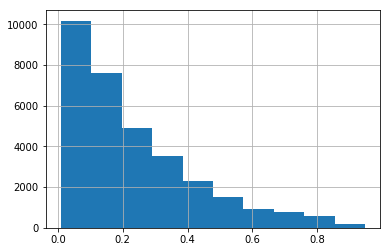

In [20]:
pd.Series(rf_model.predict_proba(x_train)[:, 1]).hist()

In [21]:
# plot_roc_curve(rf_model, x_train, y_train)

**ROC Curve and Metrics on the train data for the trained Random Forest Model**

The random forest model has a high recall score meaning the model classifies more companies as bankrupt than non-bankrupt

The model has a low precision meaning the model doesn't always get it right and is classifying as bankrupt when in fact they aren't means loosing good businiss for a bank by wrong classification.

F1 score is the haramonic mean of precision and recall, which is 0.57 so the model is preforming better than random but still room for improvement.

In [23]:
# model_metrics_print(rf_model, x_train, y_train)

In [24]:
predictions = rf_model.predict(x_train)

In [25]:
rf_model.predict_proba(x_train)[:, 1]

array([0.20899114, 0.05401318, 0.32014692, ..., 0.08392629, 0.21423676,
       0.33715597])

In [26]:
np.array(rf_model.predict(x_train))

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
pd.crosstab(
            y_train,
            predictions,
            rownames=["Actual Bankrupt "],
            colnames=["Predicted Bankrupt"],
        )

Predicted Bankrupt,0,1
Actual Bankrupt,,
0,28819,2166
1,128,1440


In [ ]:
shap_features_bar_plot(rf_model, x_train, "pink")

In [ ]:
shap_values_importance_plot(rf_model, data, 9227)

In [ ]:
plot_single_shap_values(rf_model, data, sample=9277)